In [39]:
import pandas as pd
import numpy as np
import os
import shapely
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import geopandas as gpd

print("done")


done


In [40]:
# Function to extract the numbers before the first underscore
def extract_numbers(value):
    return value.split('_')[0]

# List of files to process with full paths
files = [
    r'D:\\Data projects\\Air pollution Madrid\\data\\meteo data\\may_meteo24.csv',
    r'D:\\Data projects\\Air pollution Madrid\\data\\meteo data\\abr_meteo24.csv'
]

for file in files:
    # Read the CSV file
    df = pd.read_csv(file, sep=";")
    
    # Check if the column 'PUNTO_MUESTREO' exists in the DataFrame
    if 'PUNTO_MUESTREO' in df.columns:
        # Create the new column and fill it with the extracted values
        df['ID_EST'] = df['PUNTO_MUESTREO'].apply(extract_numbers)
        
        # Reorder columns to make the new column the first one
        columns_order = ['ID_EST'] + [col for col in df.columns if col != 'ID_EST']
        df = df[columns_order]
        #drop unnecessary cols
        df.drop(df.columns[[1, 2, 3]], axis=1, inplace=True)
    
        # Find columns that start with 'V'
        columns_with_v = [col for col in df.columns if col.startswith('V')]

        # Keep rows where any of these columns have the value 'V'
        # Variables not assigned a V correspond to not valid measurements
        for col in columns_with_v:
            df = df[df[col] == 'V']

        
        # Drop all validation columns 
        df = df.loc[:, ~df.columns.str.startswith('V')]
        # Reshape the DataFrame to have hourly data in rows
        df_melted = df.melt(id_vars=['ID_EST', 'MAGNITUD', 'PUNTO_MUESTREO', 'ANO', 'MES', 'DIA'],
                            var_name='HOUR', value_name='VALUE')
        
        # Extract the hour from the 'HOUR' column
        df_melted['HOUR'] = df_melted['HOUR'].str.extract('(\d+)', expand=False).astype(int)
        
        # Sort the DataFrame by ID_EST, MAGNITUD, and timestamp
        df_melted = df_melted.sort_values(by=['ID_EST', 'MAGNITUD', 'ANO', 'MES', 'DIA', 'HOUR'])
        # Save the modified DataFrame to a new CSV file
        output_file = file.replace('.csv', '_modified.csv')
        df_melted.to_csv(output_file, index=False)
        
df

,ID_EST,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,H02,H03,H04,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
1,28079102,81,28079102_81_98,2024,4,2,1.48,1.30,1.07,0.83,...,2.62,2.20,1.47,1.78,2.17,2.53,2.00,2.85,2.27,1.96
8,28079102,81,28079102_81_98,2024,4,9,3.47,2.63,2.57,1.55,...,1.25,1.27,1.60,1.23,0.93,1.62,1.98,1.80,2.15,2.20
9,28079102,81,28079102_81_98,2024,4,10,2.63,2.82,3.22,3.32,...,1.55,1.17,1.40,1.05,1.62,1.35,1.43,2.45,2.95,1.82
10,28079102,81,28079102_81_98,2024,4,11,2.67,2.55,3.00,1.38,...,4.27,4.93,4.42,3.27,2.77,2.88,2.82,2.57,2.48,3.07
11,28079102,81,28079102_81_98,2024,4,12,3.07,2.78,0.98,0.65,...,1.45,1.08,1.72,1.47,1.08,0.87,1.08,1.23,1.08,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,28079059,89,28079059_89_98,2024,4,25,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2640,28079059,89,28079059_89_98,2024,4,26,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2641,28079059,89,28079059_89_98,2024,4,27,0.00,0.20,0.00,0.00,...,0.60,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2642,28079059,89,28079059_89_98,2024,4,28,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [41]:
#concatenate the modified files 
may = pd.read_csv('D:\\Data projects\\Air pollution Madrid\\data\\meteo data\\may_meteo24_modified.csv',sep=",")
apr = pd.read_csv('D:\\Data projects\\Air pollution Madrid\\data\\meteo data\\abr_meteo24_modified.csv',sep=",")
meteo_data = pd.concat([apr, may], ignore_index=True)
meteo_data

,ID_EST,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,HOUR,VALUE
0,28079004,83,28079004_83_98,2024,4,1,1,6.2
1,28079004,83,28079004_83_98,2024,4,1,2,6.1
2,28079004,83,28079004_83_98,2024,4,1,3,5.7
3,28079004,83,28079004_83_98,2024,4,1,4,5.4
4,28079004,83,28079004_83_98,2024,4,1,5,5.4
...,...,...,...,...,...,...,...,...
109363,28079115,86,28079115_86_98,2024,5,31,20,16.0
109364,28079115,86,28079115_86_98,2024,5,31,21,18.0
109365,28079115,86,28079115_86_98,2024,5,31,22,20.0
109366,28079115,86,28079115_86_98,2024,5,31,23,23.0


In [42]:
# Now we merge the air_data with the coordinates of each station
# Load the CSV file
file_path = "D:\\Data projects\\Air pollution Madrid\\data\\locations\\meteo_locations_modified.csv"
locations_df = pd.read_csv(file_path, sep=",")


# Convert the ID_EST column to int to match the ID column in locations_df
meteo_data['ID_EST'] = meteo_data['ID_EST'].astype(int)

# Ensure the ID column in locations_df is also of type int (it usually should be)
locations_df['ID'] = locations_df['ID'].astype(int)

# Merge the DataFrames on the corrected ID columns
merged_df = pd.merge(meteo_data, locations_df, left_on='ID_EST', right_on='ID', how='left')

print("This is the resulting dataset")
merged_df

This is the resulting dataset


,ID_EST,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,HOUR,VALUE,ID,LATITUD,LONGITUD
0,28079004,83,28079004_83_98,2024,4,1,1,6.2,28079004,404.238.823,-37.122.567
1,28079004,83,28079004_83_98,2024,4,1,2,6.1,28079004,404.238.823,-37.122.567
2,28079004,83,28079004_83_98,2024,4,1,3,5.7,28079004,404.238.823,-37.122.567
3,28079004,83,28079004_83_98,2024,4,1,4,5.4,28079004,404.238.823,-37.122.567
4,28079004,83,28079004_83_98,2024,4,1,5,5.4,28079004,404.238.823,-37.122.567
...,...,...,...,...,...,...,...,...,...,...,...
109363,28079115,86,28079115_86_98,2024,5,31,20,16.0,28079115,403.925.444,-3.697.631
109364,28079115,86,28079115_86_98,2024,5,31,21,18.0,28079115,403.925.444,-3.697.631
109365,28079115,86,28079115_86_98,2024,5,31,22,20.0,28079115,403.925.444,-3.697.631
109366,28079115,86,28079115_86_98,2024,5,31,23,23.0,28079115,403.925.444,-3.697.631


Next step is to turn magnitude observations into columns for variables. \
This requires mapping values to their magnitud label.

In [44]:
# Drop rows with NaN values in MAGNITUD column
merged_df.dropna(subset=['MAGNITUD'], inplace=True)

NAS = merged_df["MAGNITUD"].isnull().sum()
print(f"Number of NaN values in column 'MAGNITUD': {NAS}")


Number of NaN values in column 'MAGNITUD': 0


In [45]:
merged_df['MAGNITUD'] = merged_df['MAGNITUD'].astype(int)

# Mapping of MAGNITUD codes to parameter names
magnitude_mapping = {
    80: 'RADIACION_ULTRAVIOLETA',
    81: 'VELOCIDAD_VIENTO',
    82: 'DIR_DE_VIENTO',
    83: 'TEMPERATURA',
    86: 'HUMEDAD_RELATIVA',
    87: 'PRESION_BARIOMETRICA',
    88: 'RADIACION_SOLAR',
    89: 'PRECIPITACION'
}

# Replace MAGNITUD codes with their respective names
merged_df['MAGNITUD'] = merged_df['MAGNITUD'].map(magnitude_mapping)

# Pivot the table
meteo = merged_df.pivot_table(index=['ID_EST', 'ANO', 'MES', 'DIA', 'HOUR', 'LATITUD', 'LONGITUD'],
                                    columns='MAGNITUD',
                                    values='VALUE', aggfunc='mean').reset_index()

# Flatten the columns
meteo.columns.name = None

print("The meteo dataset is ready:")
meteo

The meteo dataset is ready:


,ID_EST,ANO,MES,DIA,HOUR,LATITUD,LONGITUD,DIR_DE_VIENTO,HUMEDAD_RELATIVA,PRECIPITACION,PRESION_BARIOMETRICA,RADIACION_SOLAR,TEMPERATURA,VELOCIDAD_VIENTO
0,28079004,2024,4,1,1,404.238.823,-37.122.567,NaN,NaN,NaN,NaN,NaN,6.2,NaN
1,28079004,2024,4,1,2,404.238.823,-37.122.567,NaN,NaN,NaN,NaN,NaN,6.1,NaN
2,28079004,2024,4,1,3,404.238.823,-37.122.567,NaN,NaN,NaN,NaN,NaN,5.7,NaN
3,28079004,2024,4,1,4,404.238.823,-37.122.567,NaN,NaN,NaN,NaN,NaN,5.4,NaN
4,28079004,2024,4,1,5,404.238.823,-37.122.567,NaN,NaN,NaN,NaN,NaN,5.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30499,28079115,2024,5,31,20,403.925.444,-3.697.631,NaN,16.0,NaN,NaN,NaN,30.8,NaN
30500,28079115,2024,5,31,21,403.925.444,-3.697.631,NaN,18.0,NaN,NaN,NaN,29.5,NaN
30501,28079115,2024,5,31,22,403.925.444,-3.697.631,NaN,20.0,NaN,NaN,NaN,26.8,NaN
30502,28079115,2024,5,31,23,403.925.444,-3.697.631,NaN,23.0,NaN,NaN,NaN,25.1,NaN


Add a categorical variable for wind direction.

In [46]:
# CReate a categorical variable for Wind direction 
# Function to categorize wind direction
def categorize_wind_direction(degree):
    if 315 <= degree <= 360 or 0 <= degree <= 45:
        return 'N'
    elif 46 <= degree <= 135:
        return 'E'
    elif 136 <= degree <= 225:
        return 'S'
    elif 226 <= degree <= 314:
        return 'O'
    else:
        return 'Unknown'

# Apply the function to create a new column 'WIND_CAT'
meteo['WIND_DIR_CAT'] = meteo['DIR_DE_VIENTO'].apply(categorize_wind_direction)

# Get the column names
cols = meteo.columns.tolist()

# Locate the position of 'DIR_DE_VIENTO'
pos = cols.index('DIR_DE_VIENTO')

# Insert 'WIND_CAT' right after 'DIR_DE_VIENTO'
cols.insert(pos + 1, cols.pop(cols.index('WIND_DIR_CAT')))

# Reorder the DataFrame columns
meteo = meteo[cols]
meteo

,ID_EST,ANO,MES,DIA,HOUR,LATITUD,LONGITUD,DIR_DE_VIENTO,WIND_DIR_CAT,HUMEDAD_RELATIVA,PRECIPITACION,PRESION_BARIOMETRICA,RADIACION_SOLAR,TEMPERATURA,VELOCIDAD_VIENTO
0,28079004,2024,4,1,1,404.238.823,-37.122.567,NaN,Unknown,NaN,NaN,NaN,NaN,6.2,NaN
1,28079004,2024,4,1,2,404.238.823,-37.122.567,NaN,Unknown,NaN,NaN,NaN,NaN,6.1,NaN
2,28079004,2024,4,1,3,404.238.823,-37.122.567,NaN,Unknown,NaN,NaN,NaN,NaN,5.7,NaN
3,28079004,2024,4,1,4,404.238.823,-37.122.567,NaN,Unknown,NaN,NaN,NaN,NaN,5.4,NaN
4,28079004,2024,4,1,5,404.238.823,-37.122.567,NaN,Unknown,NaN,NaN,NaN,NaN,5.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30499,28079115,2024,5,31,20,403.925.444,-3.697.631,NaN,Unknown,16.0,NaN,NaN,NaN,30.8,NaN
30500,28079115,2024,5,31,21,403.925.444,-3.697.631,NaN,Unknown,18.0,NaN,NaN,NaN,29.5,NaN
30501,28079115,2024,5,31,22,403.925.444,-3.697.631,NaN,Unknown,20.0,NaN,NaN,NaN,26.8,NaN
30502,28079115,2024,5,31,23,403.925.444,-3.697.631,NaN,Unknown,23.0,NaN,NaN,NaN,25.1,NaN


Save the dataset for further use.

In [47]:
# Specify the directory and filename to save the combined DataFrame
output_directory = r"D:\\Data projects\\Air pollution Madrid\\data\\meteo data"
output_filename = 'meteo_geolocated.csv'
output_file = os.path.join(output_directory, output_filename)

# Save the combined DataFrame to a new CSV file
meteo.to_csv(output_file, index=False)


### Data viz
Let's check data behavior is OK

In [48]:
stations = pd.DataFrame(meteo["ID_EST"].unique(), columns = ["Meteo Station ID"])
stations


,Meteo Station ID
0,28079004
1,28079008
2,28079016
3,28079018
4,28079024
5,28079035
6,28079036
7,28079038
8,28079039
9,28079054


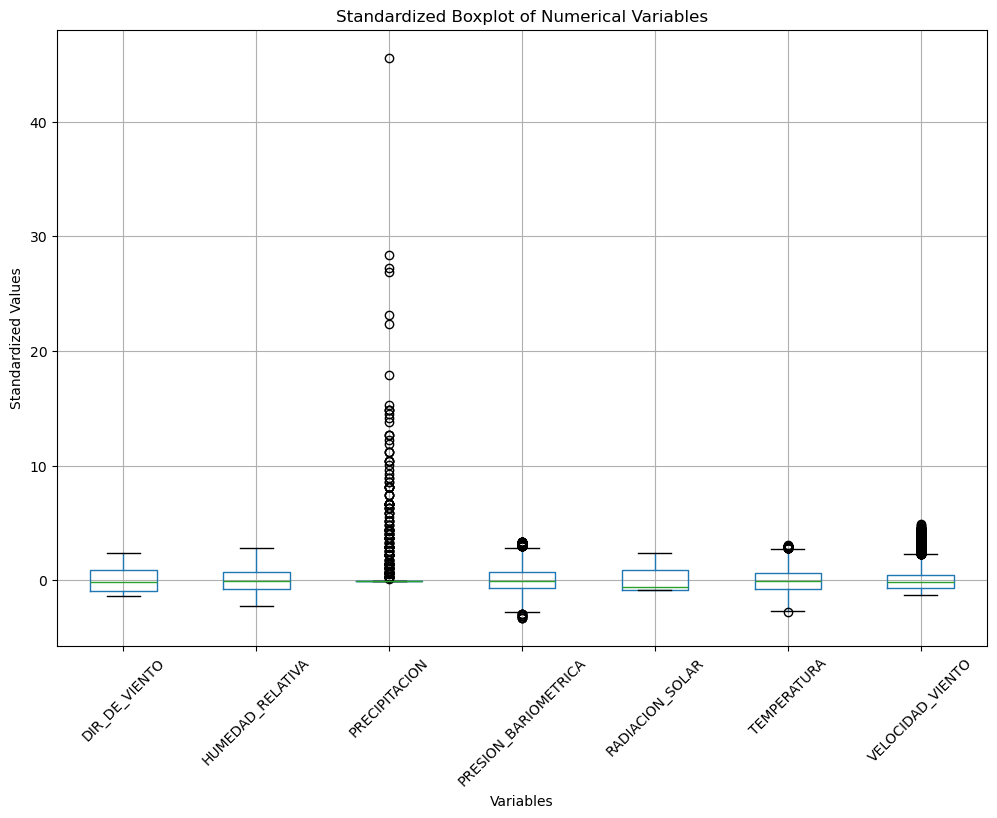

In [49]:
from sklearn.preprocessing import StandardScaler

# identify numerical cols except ID
numerical_cols = meteo.select_dtypes(include='number').columns[5:]


# Standardize the data for boxplot visualization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(meteo[numerical_cols])
standardized_df = pd.DataFrame(standardized_data, columns=numerical_cols)


# Create a boxplot for the standardized data
plt.figure(figsize=(12, 8))
standardized_df.boxplot()
plt.title('Standardized Boxplot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Standardized Values')
plt.xticks(rotation=45)
plt.show()

From below we observe little variation for rain (precipitacion)[0-6 l/m^2], yet it makes sense as we are looking at April and May. 

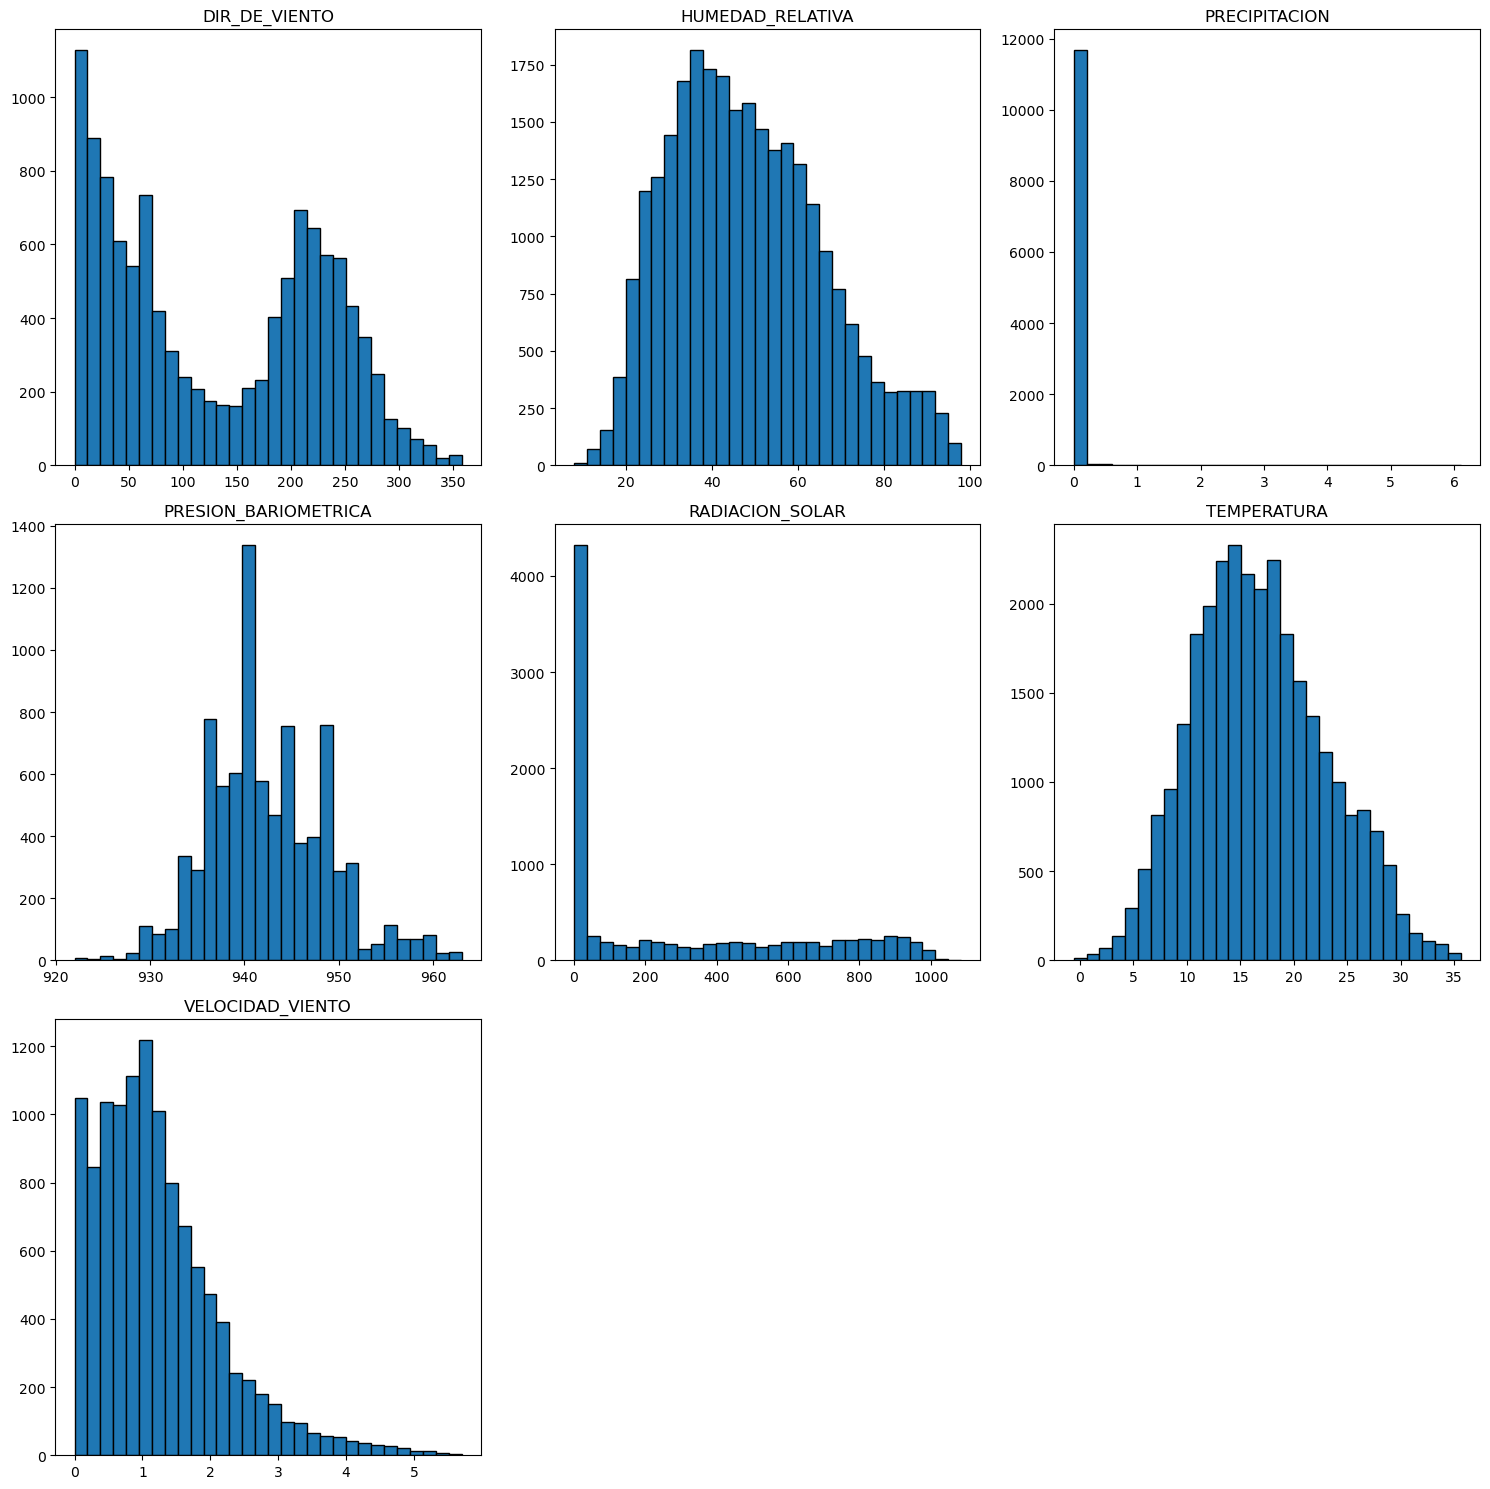

In [50]:
# Select numerical columns
numerical_cols = meteo.select_dtypes(include='number').columns[5:]

# Determine the number of rows needed
num_cols = 3
num_rows = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    axes[i].hist(meteo[col].dropna(), bins=30, edgecolor='k')
    axes[i].set_title(col)


# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
# Adjust layout
plt.tight_layout()
plt.show()